### **Importando as bibliotecas**

In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

### **Carregando os dados** 

In [137]:
etanol11 = pd.read_csv('../Data/precos-gasolina-etanol-11.csv', sep=';')
etanol12 = pd.read_csv('../Data/precos-gasolina-etanol-12.csv', sep=';')



In [138]:
#t_et11 = etanol11.head(100)
#t_et12 = etanol12.head(100)



In [139]:
df = pd.concat([etanol11,etanol12], ignore_index=True)
df.drop(['Cep','CNPJ da Revenda','Valor de Compra','Unidade de Medida','Complemento','Numero Rua','Nome da Rua'], inplace=True, axis='columns')
df = df.reindex(columns=['Regiao - Sigla','Estado - Sigla','Municipio','Bairro','Bandeira','Revenda','Valor de Venda','Produto','Data da Coleta'])
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

### Removendo "GASOLINA ADITIVADA"

In [140]:
i = df.loc[(df['Produto'] == "GASOLINA ADITIVADA")]
df.drop(i.index, inplace=True) # O .index informa que voce quer a linha, nao a coluna.
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
5,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,4.85,ETANOL,2023-11-01
6,NE,AL,PALMEIRA DOS INDIOS,SAO CRISTOVAO,IPIRANGA,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,6.22,GASOLINA,2023-11-01
...,...,...,...,...,...,...,...,...,...
101990,NE,MA,SANTA INES,PARQUE SANTA CRUZ,BRANCA,BARROS & CRUZ RODRIGUES LTDA,4.27,ETANOL,2023-12-29
101991,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,5.79,GASOLINA,2023-12-29
101992,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,3.79,ETANOL,2023-12-29
101993,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.49,GASOLINA,2023-12-29


### Revisando os dados

In [182]:
test = df.loc[df['Data da Coleta'] == '2023-11-01']
test

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
5,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,4.85,ETANOL,2023-11-01
6,NE,AL,PALMEIRA DOS INDIOS,SAO CRISTOVAO,IPIRANGA,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,6.22,GASOLINA,2023-11-01
...,...,...,...,...,...,...,...,...,...
2068,SE,MG,TEOFILO OTONI,SAO CRISTOVAO,RAIZEN,ATALAIA COMBUSTIVEIS E LUBRIFICANTES LTDA,5.49,GASOLINA,2023-11-01
2070,SE,MG,TEOFILO OTONI,SAO CRISTOVAO,RAIZEN,ATALAIA COMBUSTIVEIS E LUBRIFICANTES LTDA,3.69,ETANOL,2023-11-01
2071,S,RS,LAJEADO,SANTO ANDRE,CHARRUA,SIM REDE DE POSTOS LTDA,5.49,GASOLINA,2023-11-01
2073,S,RS,LAJEADO,SANTO ANDRE,CHARRUA,SIM REDE DE POSTOS LTDA,4.59,ETANOL,2023-11-01


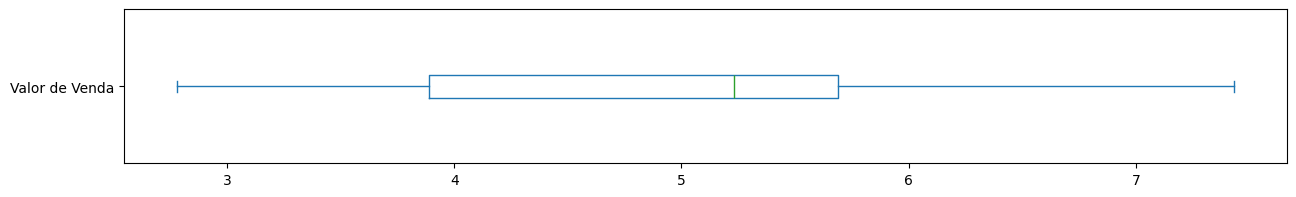

In [183]:
test['Valor de Venda'].plot.box(vert=False, figsize=(15,2));

<Axes: title={'center': 'Valor de Venda'}, ylabel='Data da Coleta'>

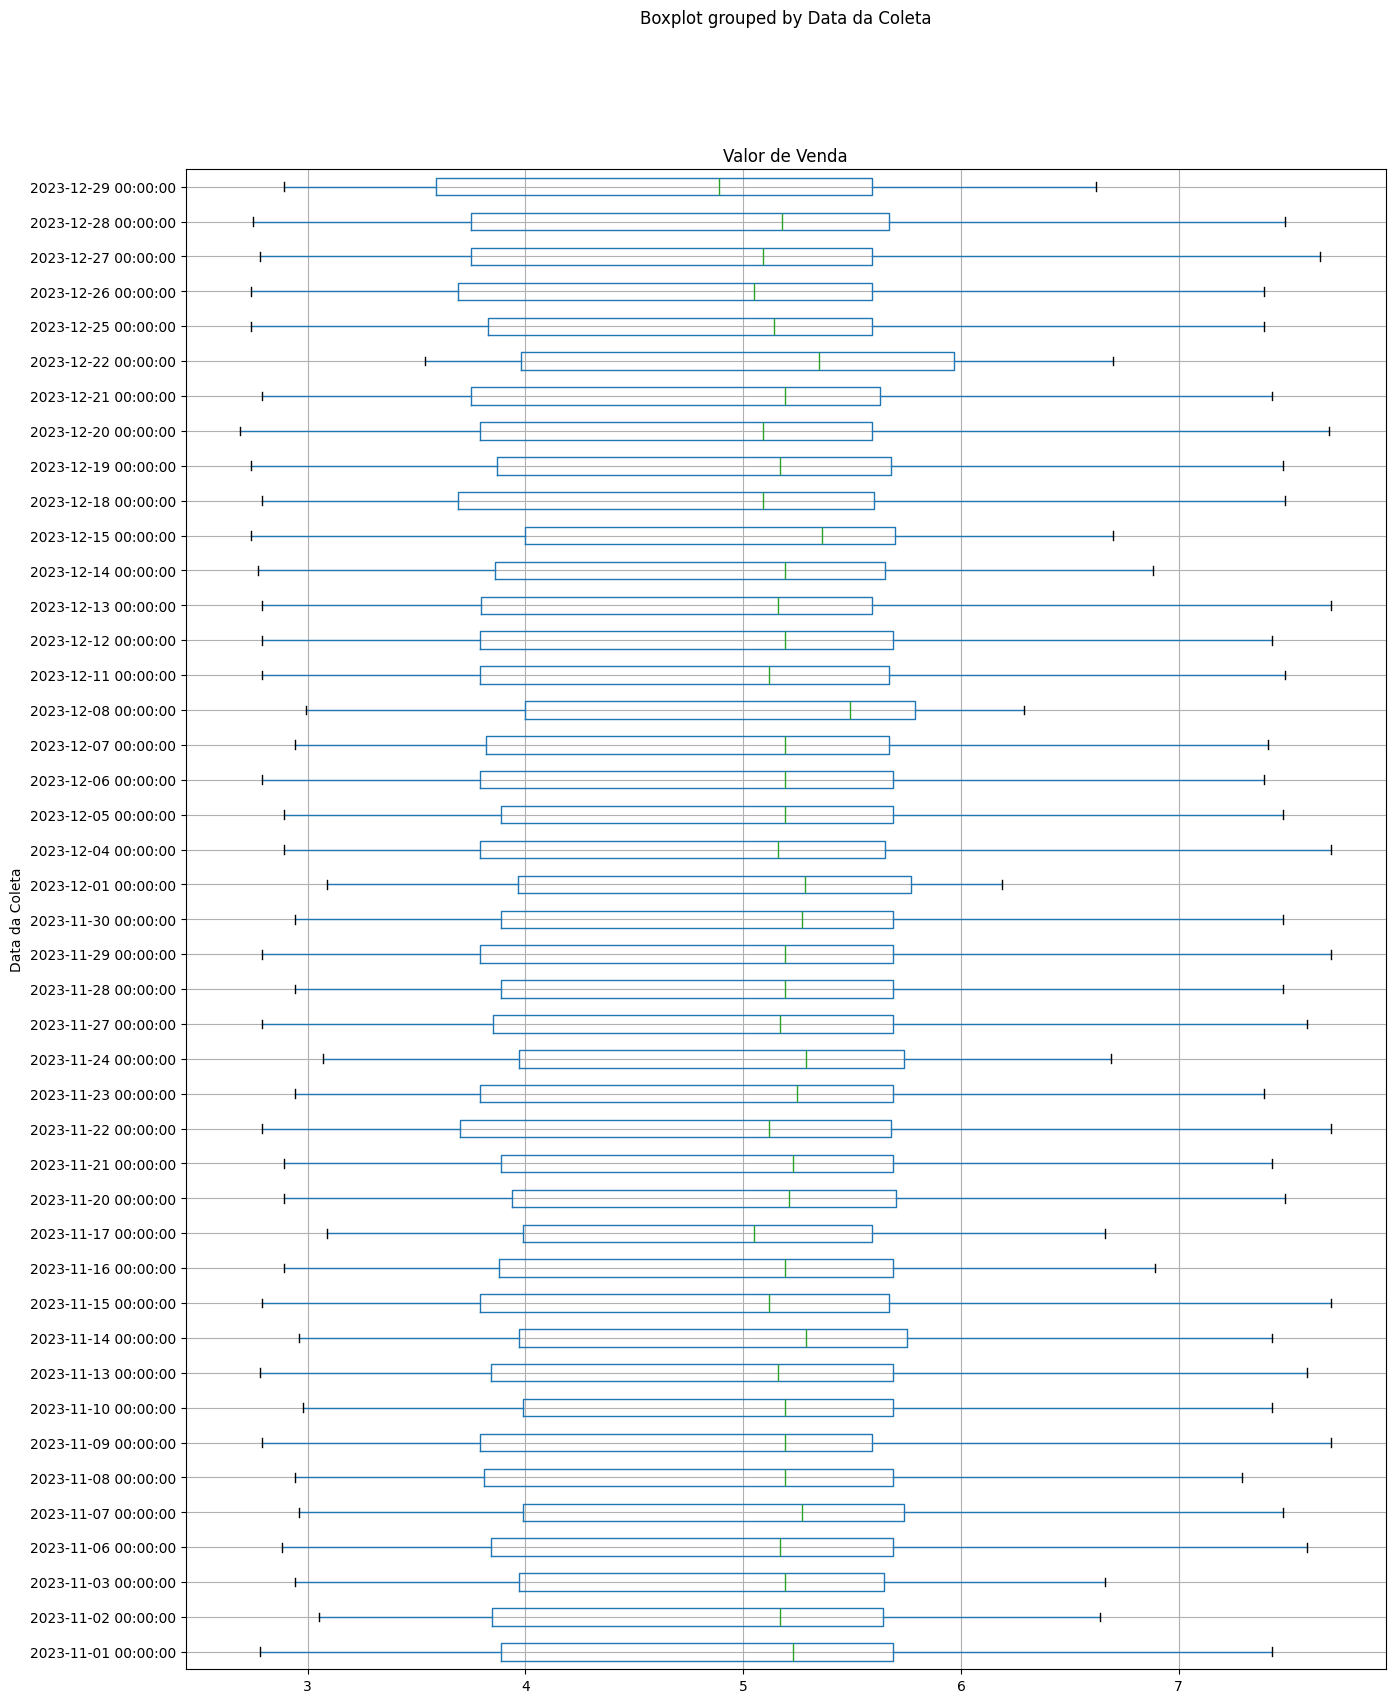

In [188]:
df.boxplot(vert = False, column='Valor de Venda', by='Data da Coleta', figsize =(15,20))

### Plotando

#### Pergunta 1 e 2

In [141]:
gp1 = df.groupby(['Data da Coleta','Produto'])['Valor de Venda'].mean()
gp1


Data da Coleta  Produto 
2023-11-01      ETANOL      3.879103
                GASOLINA    5.686607
2023-11-02      ETANOL      3.835196
                GASOLINA    5.628386
2023-11-03      ETANOL      3.974205
                              ...   
2023-12-27      GASOLINA    5.616852
2023-12-28      ETANOL      3.757453
                GASOLINA    5.682149
2023-12-29      ETANOL      3.605207
                GASOLINA    5.578553
Name: Valor de Venda, Length: 86, dtype: float64

In [142]:
df1 = pd.DataFrame(gp1)
df1

Valor de Venda
Data da Coleta Produto                 
2023-11-01     ETANOL          3.879103
               GASOLINA        5.686607
2023-11-02     ETANOL          3.835196
               GASOLINA        5.628386
2023-11-03     ETANOL          3.974205
...                                 ...
2023-12-27     GASOLINA        5.616852
2023-12-28     ETANOL          3.757453
               GASOLINA        5.682149
2023-12-29     ETANOL          3.605207
               GASOLINA        5.578553

[86 rows x 1 columns]

In [143]:
# o filtro do groupby e transformado em indices por isso tem de reseta-los
df1 = df1.reset_index()
df1

,Data da Coleta,Produto,Valor de Venda
0,2023-11-01,ETANOL,3.879103
1,2023-11-01,GASOLINA,5.686607
2,2023-11-02,ETANOL,3.835196
3,2023-11-02,GASOLINA,5.628386
4,2023-11-03,ETANOL,3.974205
...,...,...,...
81,2023-12-27,GASOLINA,5.616852
82,2023-12-28,ETANOL,3.757453
83,2023-12-28,GASOLINA,5.682149
84,2023-12-29,ETANOL,3.605207


In [144]:
df1 = df1.pivot_table(index='Produto', columns='Data da Coleta', values='Valor de Venda')
df1

Data da Coleta,2023-11-01,2023-11-02,2023-11-03,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29
Produto,,,,,,,,,,,,,,,,,,,,,
ETANOL,3.879103,3.835196,3.974205,3.824562,3.948826,3.825620,3.791846,4.012222,3.821632,3.908505,...,3.725945,3.780901,3.762321,3.731444,3.977273,3.835134,3.702903,3.732087,3.757453,3.605207
GASOLINA,5.686607,5.628386,5.700328,5.641920,5.707864,5.699992,5.670431,5.671392,5.654572,5.736272,...,5.623821,5.653653,5.573469,5.649424,5.965161,5.612367,5.579537,5.616852,5.682149,5.578553


1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do 
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?

<Axes: xlabel='Data da Coleta'>

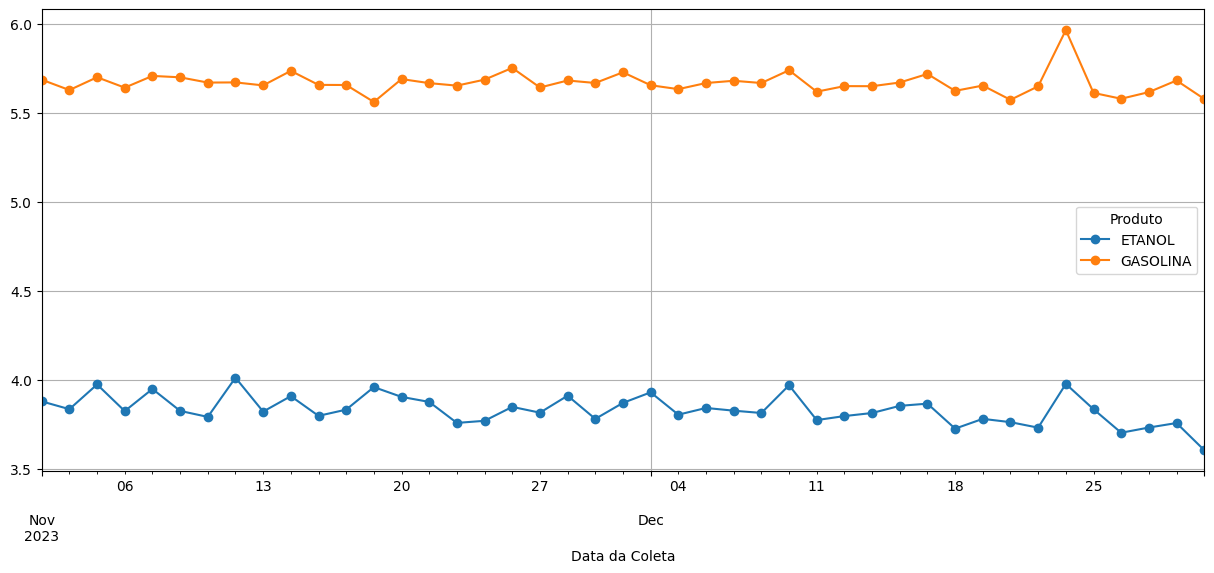

In [145]:
df1.T.plot(marker='o', grid = True, figsize=(15,6))

In [146]:
##### **Adcionando Médias**
media_etanol =df1.loc['ETANOL'].mean()
media_gas =df1.loc['GASOLINA'].mean()


In [147]:
# Tirando a prova real
print(df1.loc['ETANOL'].sum())
print(df1.loc['ETANOL'].count())

print(df1.loc['ETANOL'].sum()/df1.loc['ETANOL'].count())

164.84790158670222
43
3.8336721299233076


In [148]:
'''
# Adcionando ao dataframe original
df1.loc['Média Etanol'] = media_etanol
df1.loc['Média Gasolina'] = media_gas


#Criando dataframe
dfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]

df1 = df1.drop(['Média Etanol', 'Média Gasolina'])

df1
'''

"\n# Adcionando ao dataframe original\ndf1.loc['Média Etanol'] = media_etanol\ndf1.loc['Média Gasolina'] = media_gas\n\n\n#Criando dataframe\ndfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]\n\ndf1 = df1.drop(['Média Etanol', 'Média Gasolina'])\n\ndf1\n"

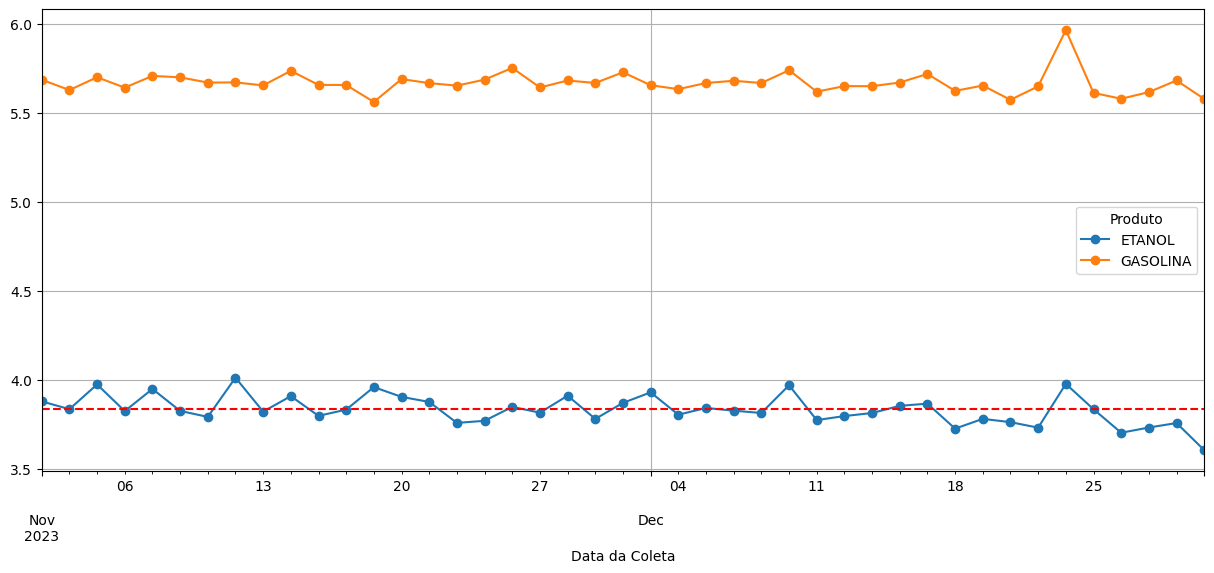

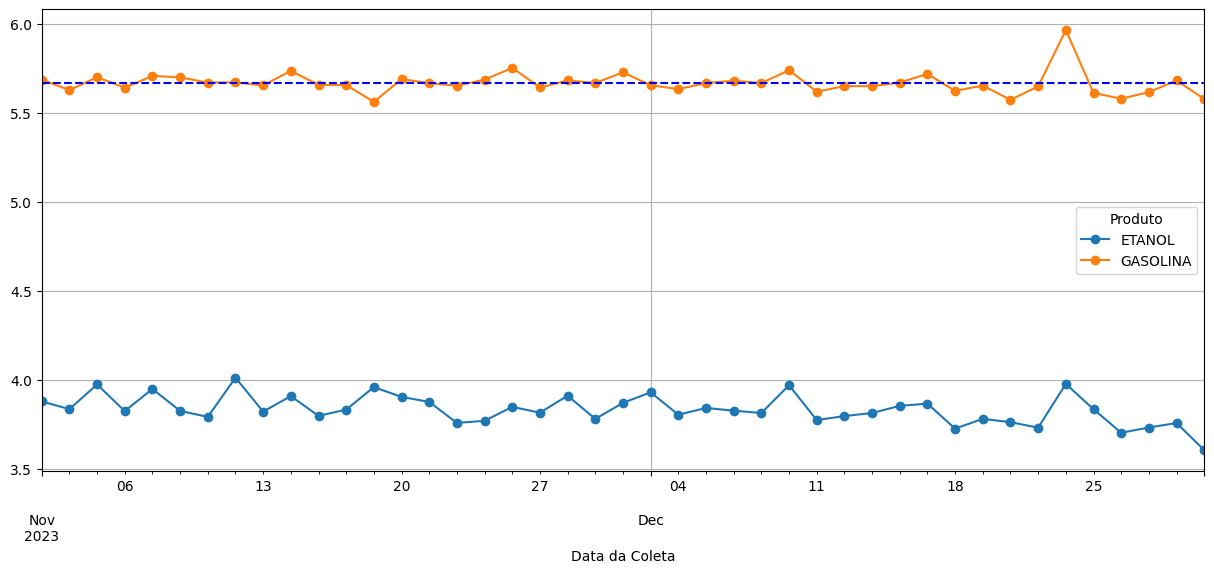

In [149]:
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_etanol), color='red', linestyle='--')
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_gas), color='blue', linestyle='--')

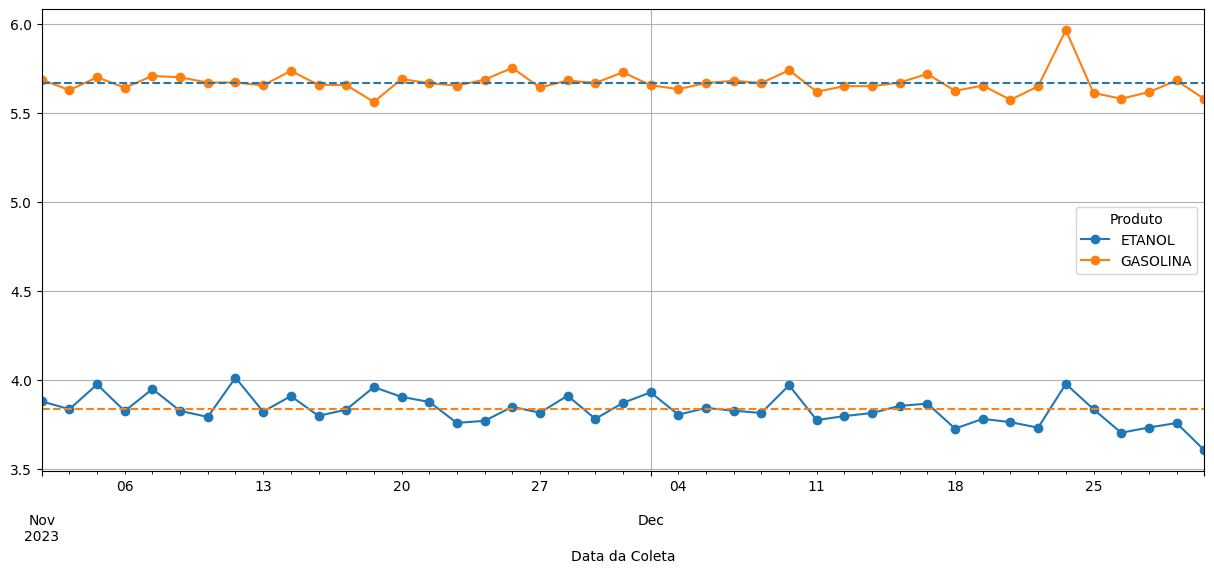

In [150]:
plot1 = df1.T.plot(marker='o', grid=True, figsize=(15,6))

plot1.axhline(y=media_etanol, color='C1', linestyle='--', label='Média Etanol')
plot1.axhline(y=media_gas, color='C0', linestyle='--', label='Média Gasolina')


#### Pergunta 3 e 4

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?

##### Com data

In [151]:
# Agrupar por estado, produto e data.
# Pegar as medias de valores por estado

gp2 = df.groupby(['Estado - Sigla','Data da Coleta','Produto'])['Valor de Venda'].mean()
gp2 = pd.DataFrame(gp2)
gp2

Valor de Venda
Estado - Sigla Data da Coleta Produto                 
AC             2023-11-01     GASOLINA        7.415000
               2023-11-07     ETANOL          5.790000
                              GASOLINA        7.466000
               2023-11-08     ETANOL          4.700000
                              GASOLINA        6.632143
...                                                ...
TO             2023-12-26     GASOLINA        5.639000
               2023-12-27     ETANOL          4.142000
                              GASOLINA        5.646923
               2023-12-28     ETANOL          4.138000
                              GASOLINA        5.768333

[1815 rows x 1 columns]

In [152]:
gp2.reset_index()

,Estado - Sigla,Data da Coleta,Produto,Valor de Venda
0,AC,2023-11-01,GASOLINA,7.415000
1,AC,2023-11-07,ETANOL,5.790000
2,AC,2023-11-07,GASOLINA,7.466000
3,AC,2023-11-08,ETANOL,4.700000
4,AC,2023-11-08,GASOLINA,6.632143
...,...,...,...,...
1810,TO,2023-12-26,GASOLINA,5.639000
1811,TO,2023-12-27,ETANOL,4.142000
1812,TO,2023-12-27,GASOLINA,5.646923
1813,TO,2023-12-28,ETANOL,4.138000


In [153]:
gp2_pivot = gp2.pivot_table(index=['Estado - Sigla', 'Produto'], columns='Data da Coleta', values='Valor de Venda')
gp2_pivot

Data da Coleta           2023-11-01  2023-11-02  2023-11-03  2023-11-06  \
Estado - Sigla Produto                                                    
AC             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA    7.415000         NaN         NaN         NaN   
AL             ETANOL      4.933333         NaN         NaN    4.487083   
               GASOLINA    6.272500         NaN         NaN    5.866522   
AM             ETANOL      4.690000         NaN         NaN    4.590000   
               GASOLINA    6.060000         NaN         NaN    6.490000   
AP             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA         NaN    5.843333         NaN         NaN   
BA             ETANOL      4.396296    4.190556    3.974000    4.367778   
               GASOLINA    5.978679    5.717778    5.596000    6.072432   
CE             ETANOL      4.477692    4.227500    4.614048    4.702174   
               GASOLINA    5.737083    5.324167    5.786190    5.832308   
DF             ETANOL      3.680833         NaN         NaN    3.740000   
               GASOLINA    5.562778         NaN         NaN    5.610000   
ES             ETANOL      4.098333         NaN         NaN    4.130345   
               GASOLINA    6.040000         NaN         NaN    5.879400   
GO             ETANOL      3.646190         NaN    3.358667    3.502105   
               GASOLINA    5.645952         NaN    5.396667    5.513276   
MA             ETANOL      4.680000         NaN    4.090000    4.633636   
               GASOLINA    5.420000         NaN    5.040000    5.800000   
MG             ETANOL      3.505818    3.638750    3.702000    3.622458   
               GASOLINA    5.422632    5.664375    5.703333    5.593529   
MS             ETANOL      4.150000         NaN         NaN    3.696571   
               GASOLINA    6.190000         NaN         NaN    5.680000   
MT             ETANOL      3.305000    3.420000    3.462000    3.248750   
               GASOLINA    5.785000    6.430000    5.834000    5.643750   
PA             ETANOL      4.676667    4.550000    4.900000    4.179000   
               GASOLINA    6.461304    6.326667    6.232500    5.643333   
PB             ETANOL      4.245714    4.052500    4.012857    4.133939   
               GASOLINA    5.755714    5.573750    5.630000    5.734000   
PE             ETANOL      4.220000    4.850000    3.881667    4.036400   
               GASOLINA    5.682500    6.635000    5.391667    5.368704   
PI             ETANOL      4.120000    4.040000    4.055556    4.158750   
               GASOLINA    5.410000    5.480000    5.458000    5.487778   
PR             ETANOL      3.917586    3.834242    3.856190    3.737222   
               GASOLINA    5.810118    5.759697    5.816190    5.708772   
RJ             ETANOL      4.001944    4.027027         NaN    4.100252   
               GASOLINA    5.673846    5.584103         NaN    5.662195   
RN             ETANOL      4.488182         NaN         NaN    4.333333   
               GASOLINA    5.610000         NaN         NaN    5.613333   
RO             ETANOL      6.470000         NaN    5.390000    4.992000   
               GASOLINA    6.530000         NaN    6.652857    6.336471   
RR             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA    5.980000         NaN         NaN    5.876000   
RS             ETANOL      4.677500    4.360000         NaN    4.549833   
               GASOLINA    5.554906    5.598182    6.140000    5.492920   
SC             ETANOL      4.674545         NaN    4.500000    4.368824   
               GASOLINA    5.703103    5.870000    5.602000    5.726897   
SE             ETANOL           NaN         NaN         NaN    4.690000   
               GASOLINA         NaN         NaN         NaN    6.145000   
SP             ETANOL      3.442500    3.530580    3.209643    3.462309   
               GASOLINA  

<Axes: ylabel='Estado - Sigla,Data da Coleta,Produto'>

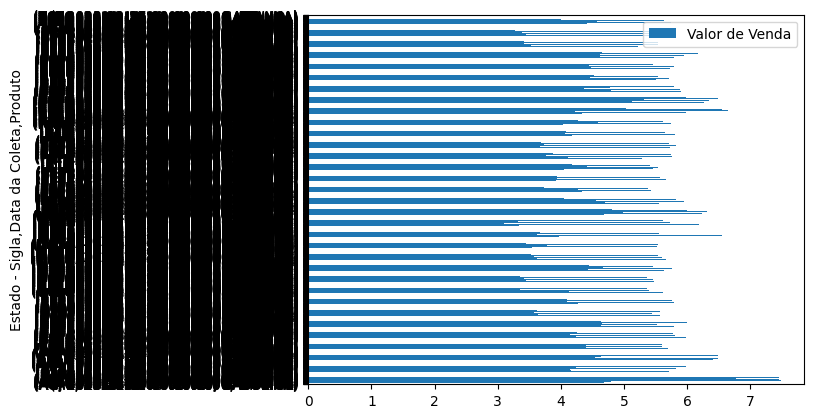

In [154]:
gp2.plot.barh()

##### Sem data

In [155]:
# Precisa de data?
gp2 = df.groupby(['Estado - Sigla','Produto'])['Valor de Venda'].mean()
gp2 = pd.DataFrame(gp2)
gp2


Valor de Venda
Estado - Sigla Produto                 
AC             ETANOL          4.808250
               GASOLINA        6.894907
AL             ETANOL          4.306241
               GASOLINA        5.868059
AM             ETANOL          4.551735
               GASOLINA        6.601109
AP             ETANOL          5.397500
               GASOLINA        5.568994
BA             ETANOL          4.238109
               GASOLINA        5.888282
CE             ETANOL          4.528349
               GASOLINA        5.795289
DF             ETANOL          3.600460
               GASOLINA        5.532317
ES             ETANOL          4.138996
               GASOLINA        5.764608
GO             ETANOL          3.503608
               GASOLINA        5.532579
MA             ETANOL          4.424092
               GASOLINA        5.512465
MG             ETANOL          3.553628
               GASOLINA        5.539809
MS             ETANOL          3.648490
               GASOLINA        5.709834
MT             ETANOL          3.170450
               GASOLINA        5.649198
PA             ETANOL          4.606010
               GASOLINA        6.001357
PB             ETANOL          3.980656
               GASOLINA        5.584381
PE             ETANOL          3.997808
               GASOLINA        5.472004
PI             ETANOL          4.077849
               GASOLINA        5.386226
PR             ETANOL          3.761886
               GASOLINA        5.746458
RJ             ETANOL          4.102228
               GASOLINA        5.695776
RN             ETANOL          4.441496
               GASOLINA        5.696989
RO             ETANOL          5.088654
               GASOLINA        6.439335
RR             ETANOL          4.872857
               GASOLINA        5.892336
RS             ETANOL          4.596458
               GASOLINA        5.605301
SC             ETANOL          4.343896
               GASOLINA        5.734883
SE             ETANOL          4.381404
               GASOLINA        5.655691
SP             ETANOL          3.412366
               GASOLINA        5.522834
TO             ETANOL          4.247546
               GASOLINA        5.841281

In [156]:
gp2 = gp2['Valor de Venda'].unstack(level='Produto')
gp2

Produto,ETANOL,GASOLINA
Estado - Sigla,,
AC,4.808250,6.894907
AL,4.306241,5.868059
AM,4.551735,6.601109
AP,5.397500,5.568994
BA,4.238109,5.888282
CE,4.528349,5.795289
DF,3.600460,5.532317
ES,4.138996,5.764608
GO,3.503608,5.532579


<Axes: xlabel='Estado - Sigla'>

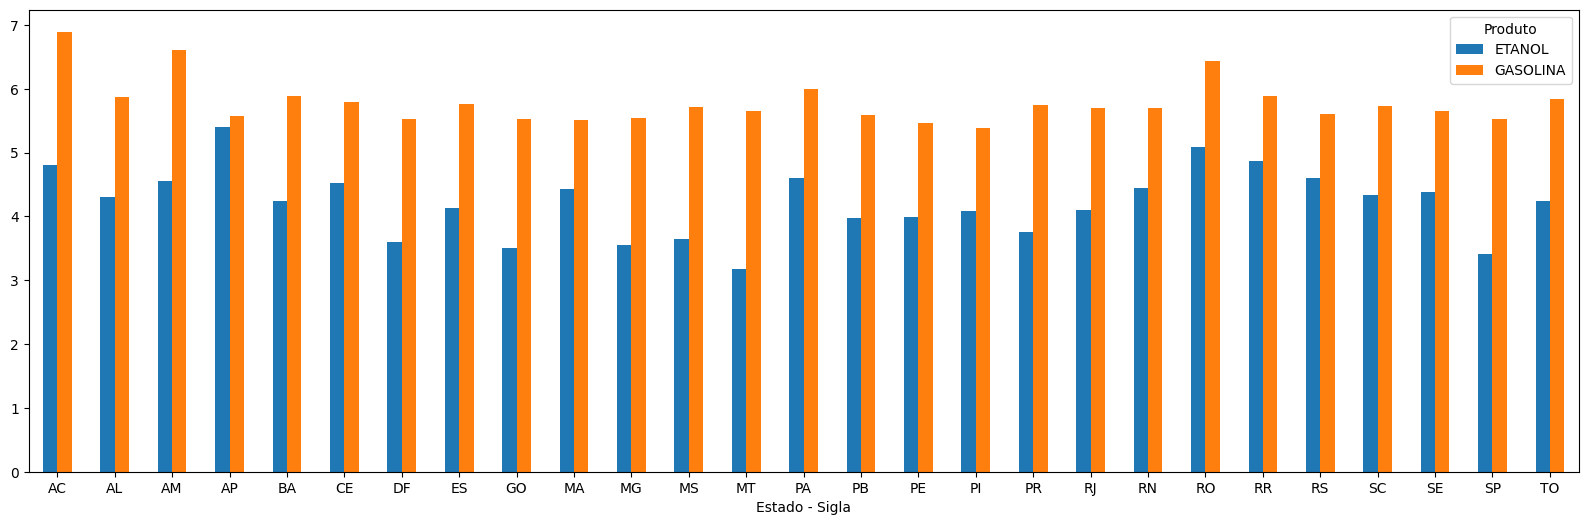

In [157]:
gp2.plot.bar(rot = 0, figsize=(20,6))

In [158]:
top_E_gp2 = gp2['ETANOL']
top_E_gp2 = top_E_gp2.sort_values(ascending=False)
#top_E_gp2 = gp2.sort_values(by=['ETANOL'])
top_E_gp2 = top_E_gp2.head(5)
#top_E_gp2

<Axes: title={'center': 'Estados com Etanol mais caro'}, xlabel='Estado - Sigla'>

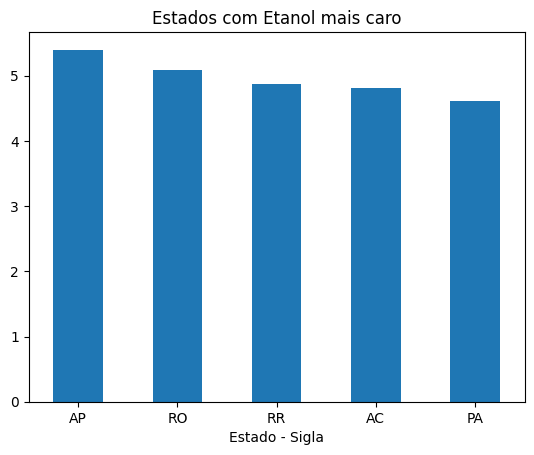

In [159]:
top_E_gp2.plot.bar(rot = 0, title = 'Estados com Etanol mais caro')

In [160]:
top_G_gp2 = gp2['GASOLINA']
top_G_gp2 = top_G_gp2.sort_values(ascending=False)
top_G_gp2 = top_G_gp2.head(5)


<Axes: title={'center': 'Estados com a Gasolina mais cara'}, xlabel='Estado - Sigla'>

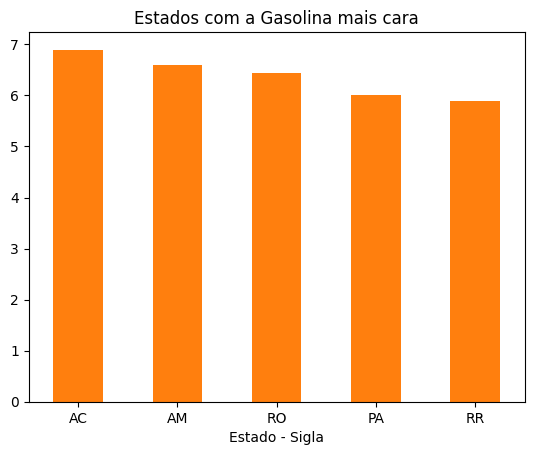

In [161]:
top_G_gp2.plot.bar(rot=0, title='Estados com a Gasolina mais cara', color='C1')

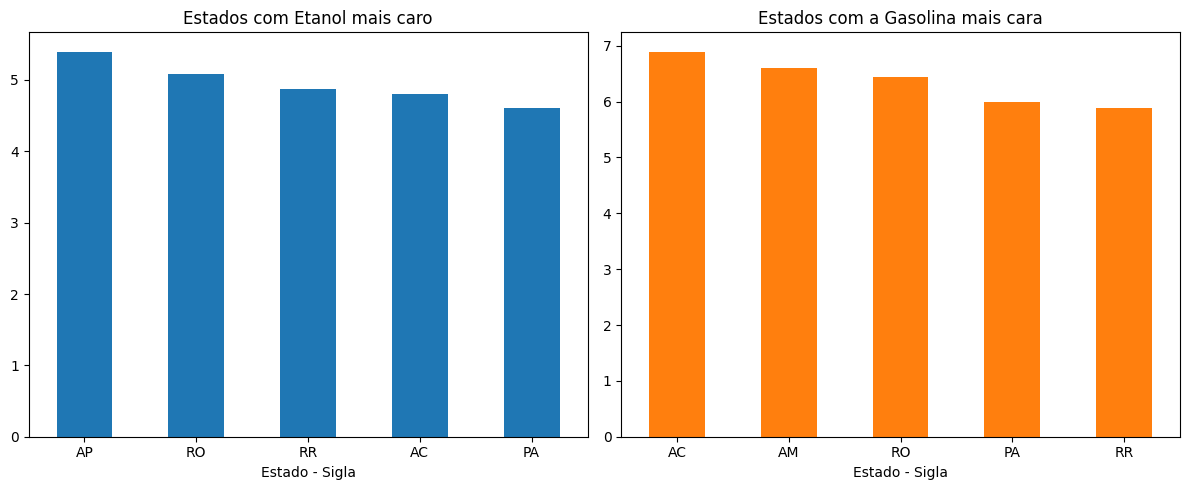

In [162]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_E_gp2.plot.bar(rot=0, title='Estados com Etanol mais caro', color='C0', ax=axs[0])
top_G_gp2.plot.bar(rot=0, title='Estados com a Gasolina mais cara', color='C1', ax=axs[1])
plt.tight_layout()


#### Pergunta 5 e 6

5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?

In [163]:
gp3 = df.groupby(['Municipio','Produto'])['Valor de Venda'].mean()
gp3 = pd.DataFrame(gp3)
gp3 = gp3['Valor de Venda'].unstack(level='Produto')
gp3


Produto,ETANOL,GASOLINA
Municipio,,
ABAETETUBA,NaN,6.032759
ACAILANDIA,4.558333,5.938421
ADAMANTINA,2.999583,5.469028
AGUAS LINDAS DE GOIAS,3.752813,5.675937
ALAGOINHAS,3.932500,5.581719
...,...,...
VOLTA REDONDA,4.311739,5.864267
VOTORANTIM,3.386415,5.529245
VOTUPORANGA,3.103889,5.502778


In [171]:
# menor preço para a etanol
pot_E_gp3 = gp3['ETANOL']
pot_E_gp3 = pot_E_gp3.sort_values()
pot_E_gp3 = pot_E_gp3.head(5)

# menor preço para a gasolina
pot_G_gp3 = gp3['GASOLINA']
pot_G_gp3 = pot_G_gp3.sort_values()
pot_G_gp3 = pot_G_gp3.head(5)




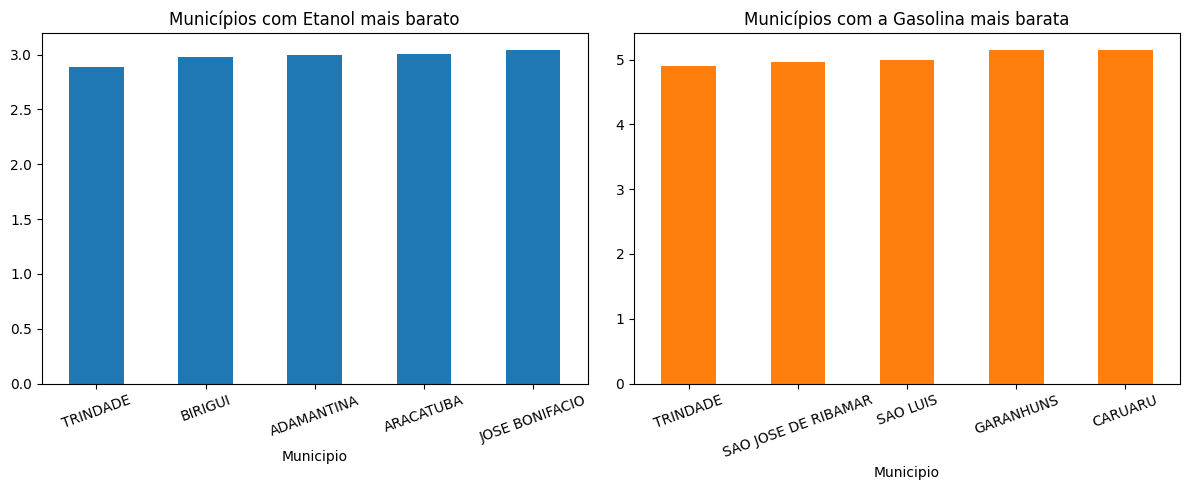

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais barato', color='C0', ax=axs[0])
pot_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais barata', color='C1', ax=axs[1])
plt.tight_layout()


In [169]:
# mair preço para a etanol
top_E_gp3 = gp3['ETANOL']
top_E_gp3 = top_E_gp3.sort_values(ascending=False)
top_E_gp3 = top_E_gp3.head(5)

# mair preço para a gasolina
top_G_gp3 = gp3['GASOLINA']
top_G_gp3 = top_G_gp3.sort_values(ascending=False)
top_G_gp3 = top_G_gp3.head(5)

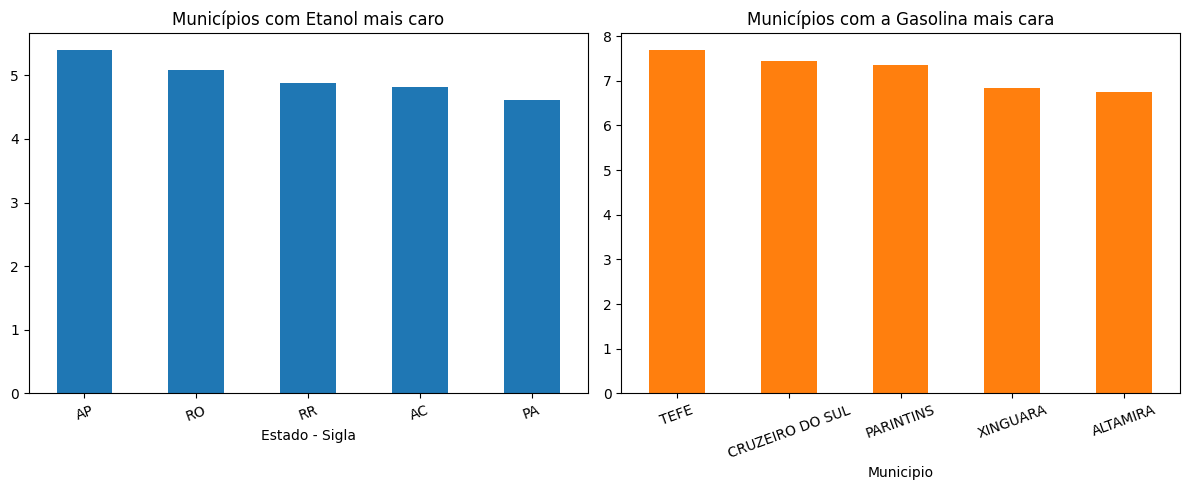

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais caro', color='C0', ax=axs[0])
top_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais cara', color='C1', ax=axs[1])
plt.tight_layout()


7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?

9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10.  Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.